# Portfolio Part 3 - Analysis of Loan Approval Data (2024 S2)

## Task background
In this Portfolio task, you will work on a new dataset named 'Loan Approval' which is a modified version from a synthetic Dataset for Risk Assessment and Loan Approval Modeling (many thanks to LORENZO ZOPPELLETTO for the sharing of this dataset). This dataset comprises 20,000 records of personal and financial data, designed to facilitate the development of predictive models for risk assessment and loan approval. In this portfolio part, you are mainly required to train classification models to determine the outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.

The dataset includes diverse features such as demographic information, credit history, employment status, income levels, existing debt, and other relevant financial metrics, providing a comprehensive foundation for sophisticated data-driven analysis and decision-making.

The dataset includes the following columns:

|Column|Meaning|
|:-----|:-----|
|ApplicationDate| Loan application date|
|Age| Applicant's age|
|AnnualIncome| Yearly income|
|CreditScore| Creditworthiness score|
|EmploymentStatus| Job situation|
|EducationLevel| Highest education attained|
|Experience| Work experience|
|LoanAmount| Requested loan size|
|LoanDuration| Loan repayment period|
|MaritalStatus| Applicant's marital state|
|NumberOfDependents| Number of dependents|
|HomeOwnershipStatus| Homeownership type|
|MonthlyDebtPayments| Monthly debt obligations|
|CreditCardUtilizationRate| Credit card usage percentage|
|NumberOfOpenCreditLines| Active credit lines|
|NumberOfCreditInquiries| Credit checks count|
|DebtToIncomeRatio| Debt to income proportion|
|BankruptcyHistory| Bankruptcy records|
|LoanPurpose| Reason for loan|
|PreviousLoanDefaults| Prior loan defaults|
|PaymentHistory| Past payment behavior|
|LengthOfCreditHistory| Credit history duration|
|SavingsAccountBalance| Savings account amount|
|CheckingAccountBalance| Checking account funds|
|TotalAssets| Total owned assets|
|TotalLiabilities| Total owed debts|
|MonthlyIncome| Income per month|
|UtilityBillsPaymentHistory| Utility payment record|
|JobTenure| Job duration|
|NetWorth| Total financial worth|
|BaseInterestRate| Starting interest rate|
|InterestRate| Applied interest rate|
|MonthlyLoanPayment| Monthly loan payment|
|TotalDebtToIncomeRatio| Total debt against income|
|LoanApproved| Loan approval status|
|RiskScore| Risk assessment score|

## Task Description
Your high level goal in this notebook is to build and evaluate predictive models for 'loan approval' from other available features. More specifically, you need to complete the following major tasks:

1. Clean and preprocess the dataset for the downstream data analysis tasks.

2. Build and evaluate logistic regression models with this datasets.

3. Build and evaluate KNN models with this datasets.

Note 1: While the main steps of each task have been given with the requirements, you should learn how to properly organise and comment your notebook by yourself to ensure that your notebook file is professional and readable.

Note 2: You will be evaluated on the accuracy of the model, the process that you produce the results,  and your clear description and justification of your implementation. So, try your best to comment your source code to showing your understanding and critical thinking.


## Load the dataset and show the basic information

In [5]:
import pandas as pd

data = pd.read_csv('dataporto3/loan_approval.csv')
data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45.0,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,NaN
1,2018-01-02,38.0,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47.0,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,NaN
3,2018-01-04,58.0,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,NaN
4,2018-01-05,37.0,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         19900 non-null  float64
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               19900 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [7]:
data.describe(include="all")

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000,19900.000000,20000.000000,20000.000000,20000,20000,20000.000000,20000.000000,20000.000000,19900,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,1000.000000
unique,20000,NaN,NaN,NaN,3,5,NaN,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-01-01,NaN,NaN,NaN,Employed,Bachelor,NaN,NaN,NaN,Married,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,17036,6054,NaN,NaN,NaN,9999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,39.751759,59161.473550,571.612400,NaN,NaN,17.522750,24882.867800,54.057000,NaN,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.687600
std,NaN,11.630809,40350.845168,50.997358,NaN,NaN,11.316836,13427.421217,24.664857,NaN,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.881033
min,NaN,18.000000,15000.000000,343.000000,NaN,NaN,0.000000,3674.000000,12.000000,NaN,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,30.400000
25%,NaN,31.750000,31679.000000,540.000000,NaN,NaN,9.000000,15575.000000,36.000000,NaN,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,NaN,40.000000,48566.000000,578.000000,NaN,NaN,17.000000,21914.500000,48.000000,NaN,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,NaN,48.000000,74391.000000,609.000000,NaN,NaN,25.000000,30835.000000,72.000000,NaN,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000


## Task 1: Clean the datasets (10 marks)

### Step 1.1 Handle the missing values with follwoing rules (5 marks)
1. If over 50% of the values of a column, the column should be removed from the data frame; 
2. For a categorical column, if a row contains a missing value, you need to delete the whole row; 
3. For a numerical column, if a row contains a missing value, you need to perform a missing value imputation with the average value of the column.

In [10]:
# Find the missing value
data_info = data.info()
missing_values = data.isnull().sum()

missing_values, data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         19900 non-null  float64
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               19900 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

(ApplicationDate                   0
 Age                             100
 AnnualIncome                      0
 CreditScore                       0
 EmploymentStatus                  0
 EducationLevel                    0
 Experience                        0
 LoanAmount                        0
 LoanDuration                      0
 MaritalStatus                   100
 NumberOfDependents                0
 HomeOwnershipStatus               0
 MonthlyDebtPayments               0
 CreditCardUtilizationRate         0
 NumberOfOpenCreditLines           0
 NumberOfCreditInquiries           0
 DebtToIncomeRatio                 0
 BankruptcyHistory                 0
 LoanPurpose                       0
 PreviousLoanDefaults              0
 PaymentHistory                    0
 LengthOfCreditHistory             0
 SavingsAccountBalance             0
 CheckingAccountBalance            0
 TotalAssets                       0
 TotalLiabilities                  0
 MonthlyIncome                     0
 

#### Coclusion
- Dataset has 36 columns and 20000 rows
- Missing values:
    - 100 in Age (replace by average)
    - 100 in MaritalStatus (delete catagorical columns)
    - 19000 in RiskScore (delete over 50% of the values of a column (95%))

In [12]:
# Replace missing values in the 'Age' column with mean
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [13]:
# Drop categorical rows columns with missing values
data_cleaned = data.dropna(subset=['MaritalStatus'])

In [14]:
# Remove columns with more than 50% missing values
threshold = len(data_cleaned) * 0.5
data_cleaned = data_cleaned.dropna(thresh=threshold, axis=1)

In [15]:
# Display the cleaned data information and check if missing values are handled
cleaned_info = data_cleaned.info()
missing_values_after = data_cleaned.isnull().sum()

cleaned_info, missing_values_after

<class 'pandas.core.frame.DataFrame'>
Index: 19900 entries, 0 to 19999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             19900 non-null  object 
 1   Age                         19900 non-null  float64
 2   AnnualIncome                19900 non-null  int64  
 3   CreditScore                 19900 non-null  int64  
 4   EmploymentStatus            19900 non-null  object 
 5   EducationLevel              19900 non-null  object 
 6   Experience                  19900 non-null  int64  
 7   LoanAmount                  19900 non-null  int64  
 8   LoanDuration                19900 non-null  int64  
 9   MaritalStatus               19900 non-null  object 
 10  NumberOfDependents          19900 non-null  int64  
 11  HomeOwnershipStatus         19900 non-null  object 
 12  MonthlyDebtPayments         19900 non-null  int64  
 13  CreditCardUtilizationRate   19900 no

(None,
 ApplicationDate               0
 Age                           0
 AnnualIncome                  0
 CreditScore                   0
 EmploymentStatus              0
 EducationLevel                0
 Experience                    0
 LoanAmount                    0
 LoanDuration                  0
 MaritalStatus                 0
 NumberOfDependents            0
 HomeOwnershipStatus           0
 MonthlyDebtPayments           0
 CreditCardUtilizationRate     0
 NumberOfOpenCreditLines       0
 NumberOfCreditInquiries       0
 DebtToIncomeRatio             0
 BankruptcyHistory             0
 LoanPurpose                   0
 PreviousLoanDefaults          0
 PaymentHistory                0
 LengthOfCreditHistory         0
 SavingsAccountBalance         0
 CheckingAccountBalance        0
 TotalAssets                   0
 TotalLiabilities              0
 MonthlyIncome                 0
 UtilityBillsPaymentHistory    0
 JobTenure                     0
 NetWorth                      0
 Ba

#### Step 1.1 Result
- Dataset has 19900 rows and 25 columns
- No missing value left

### Step 1.2 Handle categorical attributes (5 marks)
1. If all the categorical values of a column are unique, this column does not provide any statistical informaiton and should be deleted.
2. Use one hot encoding to convert the categorical values into numerical ones.

In [18]:
# Remove columns with all the categorical values of a column, does not provide any statistical information
# Identify columns with categorical data
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns

# Remove columns where all categorical values are unique
for col in categorical_cols:
    if data_cleaned[col].nunique() == len(data_cleaned):
        data_cleaned = data_cleaned.drop(col, axis=1)

In [19]:
# Finding unique values for all object (categorical) columns in the original dataframe (before encoding)
object_columns_original = data_cleaned.select_dtypes(include=['object']).columns

# Loop through each object column and print the unique values
unique_values_object_columns_original = {column: data_cleaned[column].unique() for column in object_columns_original}

unique_values_object_columns_original

{'EmploymentStatus': array(['Employed', 'Self-Employed', 'Unemployed'], dtype=object),
 'EducationLevel': array(['Master', 'Associate', 'Bachelor', 'High School', 'Doctorate'],
       dtype=object),
 'MaritalStatus': array(['Married', 'Single', 'Divorced', 'Widowed'], dtype=object),
 'HomeOwnershipStatus': array(['Own', 'Mortgage', 'Rent', 'Other'], dtype=object),
 'LoanPurpose': array(['Home', 'Debt Consolidation', 'Education', 'Other', 'Auto'],
       dtype=object)}

In [20]:
# Apply one-hot encoding to the remaining categorical columns
data_encoded = pd.get_dummies(data_cleaned)

In [21]:
# Display the resulting dataframe info
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19900 entries, 0 to 19999
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             19900 non-null  float64
 1   AnnualIncome                    19900 non-null  int64  
 2   CreditScore                     19900 non-null  int64  
 3   Experience                      19900 non-null  int64  
 4   LoanAmount                      19900 non-null  int64  
 5   LoanDuration                    19900 non-null  int64  
 6   NumberOfDependents              19900 non-null  int64  
 7   MonthlyDebtPayments             19900 non-null  int64  
 8   CreditCardUtilizationRate       19900 non-null  float64
 9   NumberOfOpenCreditLines         19900 non-null  int64  
 10  NumberOfCreditInquiries         19900 non-null  int64  
 11  DebtToIncomeRatio               19900 non-null  float64
 12  BankruptcyHistory               19900

In [22]:
# Convert the categorical values (bool) into numerical
bool_columns = data_encoded.select_dtypes(include=['bool']).columns

# Step 2: Convert boolean columns to integers (0 for False, 1 for True)
data_encoded[bool_columns] = data_encoded[bool_columns].astype(int)

# Check the result to confirm the change
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19900 entries, 0 to 19999
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             19900 non-null  float64
 1   AnnualIncome                    19900 non-null  int64  
 2   CreditScore                     19900 non-null  int64  
 3   Experience                      19900 non-null  int64  
 4   LoanAmount                      19900 non-null  int64  
 5   LoanDuration                    19900 non-null  int64  
 6   NumberOfDependents              19900 non-null  int64  
 7   MonthlyDebtPayments             19900 non-null  int64  
 8   CreditCardUtilizationRate       19900 non-null  float64
 9   NumberOfOpenCreditLines         19900 non-null  int64  
 10  NumberOfCreditInquiries         19900 non-null  int64  
 11  DebtToIncomeRatio               19900 non-null  float64
 12  BankruptcyHistory               19900

In [23]:
data_encoded.head()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MaritalStatus_Widowed,HomeOwnershipStatus_Mortgage,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,LoanPurpose_Auto,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,45.0,39948,617,22,13152,48,2,183,0.354418,1,...,0,0,0,1,0,0,0,0,1,0
1,38.0,39709,628,15,26045,48,1,496,0.087827,5,...,0,1,0,0,0,0,1,0,0,0
2,47.0,40724,570,26,17627,36,2,902,0.137414,2,...,0,0,0,0,1,0,0,1,0,0
3,58.0,69084,545,34,37898,96,1,755,0.267587,2,...,0,1,0,0,0,0,0,0,1,0
4,37.0,103264,594,17,9184,36,1,274,0.320535,0,...,0,1,0,0,0,0,1,0,0,0


#### Task 1 Done (data_encode) 50 columns and 19900 datas
- No missing values
- No categorical values
- Encode in numerical form

## Task 2: Build a logistic regression classification model (25 marks)

### Step 2.1 Specify the features and the label, and split the dataset into training data and testing data (5 marks)
1. The attirbute "LoanApproved" is the label, which is the prediction target. The remaining attributes are the features.
2. The ratio for splitting the dataset is 80% for training and 20% for testing. Note that you need to set the "random_state" parameter as your student ID to produce your personlised splitting. Failing to do so will lose marks.

In [27]:
# Define the features X and label Y
X = data_encoded.drop('LoanApproved', axis=1) 
y = data_encoded['LoanApproved']  

- X : All columns except 'LoanApproved'
- Y : columns 'LoanApproved' for prediction target

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
# Split the dataset
# random_state = 47895810
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47895810)

# Shapes of split dataset
print("Training:", X_train.shape)
print("Testing:", X_test.shape)
print("Training:", y_train.shape)
print("Testing:", y_test.shape)

Training: (15920, 49)
Testing: (3980, 49)
Training: (15920,)
Testing: (3980,)


### Step 2.2 Build a logistic regression model (10 marks)
1. Train a logistic regression model
2. Report two classification performance metrics (accuracy and f1-score) on the testing data
3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [33]:
# Train the logistic regression model
model = LogisticRegression()

#Train the model using the training data
model.fit(X_train, y_train)

C:\Users\Sulaiman\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
# Doing predictions on train and test set
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

# Evaluate the performance of your trained model
print("Accuracy score on training set: ", accuracy_score(y_train, y_hat_train))
print("Accuracy score on testing set: ", accuracy_score(y_test, y_hat_test))

Accuracy score on training set:  0.8895728643216081
Accuracy score on testing set:  0.8886934673366834


There is a very small gap in the accuracy scores for training and testing set, so there is no overfitting of the model.

In [36]:
# Calculate accuracy and f1-score for training and testing data
train_f1 = f1_score(y_train, y_hat_train)
test_f1 = f1_score(y_test, y_hat_test)

# Report the results
print("Training Data - F1-Score:", train_f1)
print("Testing Data - F1-Score:", test_f1)

Training Data - F1-Score: 0.7528816418330053
Testing Data - F1-Score: 0.7611859838274933


the F1-Score value between training and testing data is almost the same, indicating that the model is able to balance precision and recall well, and has stable performance and good generalization

In [38]:
# Checking confusion matrix
print("Confusion matrix on test set: ")
print(confusion_matrix(y_test, y_hat_test))
print("Confusion matrix on train set: ")
print(confusion_matrix(y_train, y_hat_train))

Confusion matrix on test set: 
[[2831  175]
 [ 268  706]]
Confusion matrix on train set: 
[[11484   670]
 [ 1088  2678]]


There are no signs of significant overfitting, as the results on training and test data are quite consistent. This shows that the model is able to recognize patterns in the training data well and apply them effectively to the testing data.

Accuracy:
1. Training Set Accuracy: 88.96%
2. Testing Set Accuracy: 88.87%

F1-Score:
1. Training Set F1-Score: 75.29%
2. Testing Set F1-Score: 76.12%

Confusion Matrix:

1. Testing Set:
- True Negatives (TN): 2831
- False Positives (FP): 175
- False Negatives (FN): 268
- True Positives (TP): 706

2. Training Set:
- True Negatives (TN): 11484
- False Positives (FP): 670
- False Negatives (FN): 1088
- True Positives (TP): 2678

#### Analysis:
##### Accuracy Comparison:
- The accuracy on both the training and testing sets is very close (88.96% and 88.87%), which indicates that the model is performing well on both the training and testing data.
- There is a very small drop in accuracy from the training to the testing set, which is normal. This suggests the model is generalizing well and not overfitting.
##### F1-Score Comparison:
The F1-Score is also very similar between the training and testing sets (75.29% and 76.12%). This further supports the model is performing consistently on the dataset.
##### Confusion Matrix Interpretation:
- On both the training and testing sets, the model correctly predicts most of the instances. The number of false positives and false negatives is relatively low compared to the true positives and true negatives. 
- The balance between correct predictions and errors is similar in both sets, which suggests that the model is not overfitting.

#### Conclusion:
Based on the accuracy, F1-scores, and confusion matrices, the model demonstrates consistent and balanced performance. The small differences in accuracy and F1-score indicate that the model is not overfitting. It generalizes well to new, unseen data, as demonstrated by its performance on the testing set. The confusion matrix for both datasets shows relatively low prediction errors and similar patterns, suggesting that the model effectively presents the dataset. With stable performance, the model is reliable for predicting loan approval decisions with high accuracy with minimal risk of errors.

### Step 2.3 Perform the recursive feature elimination (RFE) technique to identify the effective features for building the model (10 marks)
1. Visulise the change of the two performance metrics with respect to the number of eliminated features using a line chart.
2. In terms of the visualisation result, select a good value for the number of eliminated features with considering both performance maximisation and feature minimisation (two competing goals). Run the RFE again with the chosen number of eliminated features to obtain the corresponding set of retained features.

In [43]:
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

In [44]:
# List for F1 and accuracy
accuracy_list = []
f1_list = []
model = LogisticRegression()

for n_features_to_select in range(1, X_train.shape[1] + 1):
    
    # Apply RFE
    rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
    rfe.fit(X_train, y_train)
    
    # Prediction
    y_test_pred = rfe.predict(X_test)
    
    # Calculate accuracy and F1-score
    accuracy = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    
    # append the result
    accuracy_list.append(accuracy)
    f1_list.append(f1)

C:\Users\Sulaiman\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sulaiman\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

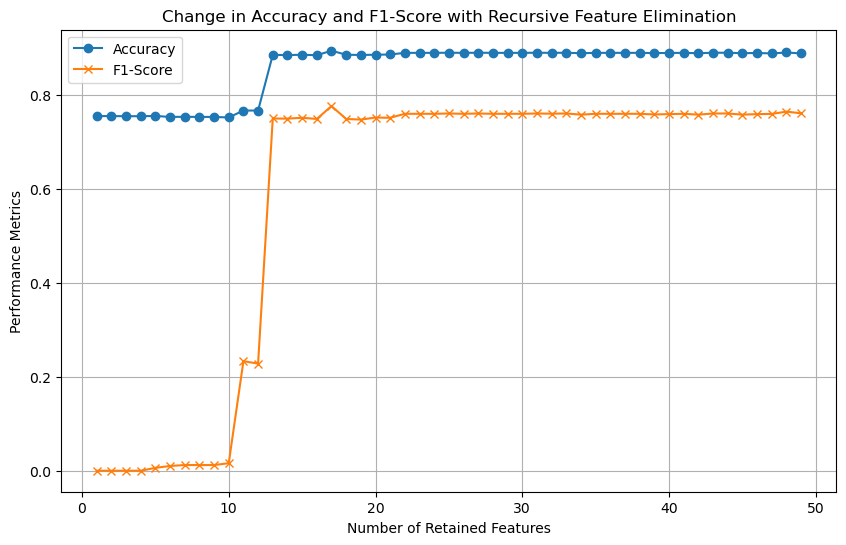

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, X_train.shape[1] + 1), accuracy_list, label='Accuracy', marker='o')
plt.plot(range(1, X_train.shape[1] + 1), f1_list, label='F1-Score', marker='x')
plt.xlabel('Number of Retained Features')
plt.ylabel('Performance Metrics')
plt.title('Change in Accuracy and F1-Score with Recursive Feature Elimination')
plt.legend()
plt.grid(True)
plt.show()

With 13 features, we have achieved very good performance without having to add more features, which could increase the complexity of the model. Thus, 13 features are the optimal point where both goals performance maximization and feature minimization are achieved.

In [47]:
# Apply RFE with the optimal number of features (13)
rfe_optimal = RFE(model, n_features_to_select=13)

# Fit the RFE model on the training data
rfe_optimal.fit(X_train, y_train)

# Get the selected features (the retained 13 features)
selected_features = X_train.columns[rfe_optimal.support_]

# Display the selected features
print("Selected Features:", selected_features)

C:\Users\Sulaiman\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sulaiman\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

Selected Features: Index(['Age', 'Experience', 'LoanDuration', 'NumberOfDependents',
       'MonthlyDebtPayments', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'PaymentHistory', 'MonthlyIncome',
       'UtilityBillsPaymentHistory', 'JobTenure', 'MonthlyLoanPayment',
       'EducationLevel_High School'],
      dtype='object')


C:\Users\Sulaiman\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Selected Features:
'Age', 'Experience', 'LoanDuration', 'NumberOfDependents', 
'MonthlyDebtPayments', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries',
'PaymentHistory', 'MonthlyIncome', 'UtilityBillsPaymentHistory', 
'JobTenure', 'MonthlyLoanPayment', 'EducationLevel_High School'

In [49]:
# Filter data with the selected feature
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [50]:
rfe_model = LogisticRegression()

# New model with selected feture
rfe_model.fit(X_train_selected, y_train)

y_test_pred = rfe_model.predict(X_test_selected)

# Evaluasi performance model
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print(f"Accuracy rfe: {accuracy}")
print(f"F1-Score rfe: {f1}")

Accuracy rfe: 0.885678391959799
F1-Score rfe: 0.7501372872048325


C:\Users\Sulaiman\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


There is no indication of overfitting in these results. Even though performance decreases slightly after reducing features, the model performs quite well with high accuracy and F1-score. The model can still generalize test data well, even though it uses fewer features. 
##### Conclusion: 
- Accuracy of 88.57% and F1-Score of 75.01% show that even though we only use 13 features, the model still produces accurate and balanced predictions.
- The performance degradation that occurs is small and natural when features are reduced, but we have achieved model efficiency by retaining the most important features without sacrificing too much performance.

## Task 3: Build a KNN classification model (25 marks)

### Step 3.1 Build 1-NN classifier (5 marks)
1. Slect the features identifed in Step 2.3 for this task
2. Buid 1-NN classifier and report two classification performance metrics (accuracy and f1-score) on the testing data
3. Also report the two metrics on the training data, and compare the results with that of the testing data. Make a justification on whether the model is overfitting based on the comparison.

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
# Initialize the 1-NN classifier
knn = KNeighborsClassifier(n_neighbors=1)

# Train the classifier with the selected features
knn.fit(X_train_selected, y_train)

KNeighborsClassifier(n_neighbors=1)

In [56]:
# Make predictions
y_train_pred = knn.predict(X_train_selected)
y_test_pred = knn.predict(X_test_selected)

# Calculate accuracy and F1-score for the training and testing
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Training F1-Score: {train_f1}")
print(f"Testing Accuracy: {test_accuracy}")
print(f"Testing F1-Score: {test_f1}")

Training Accuracy: 1.0
Training F1-Score: 1.0
Testing Accuracy: 0.8183417085427136
Testing F1-Score: 0.6298003072196621


#### Analysis of the 1-NN Classifier:
##### Training Accuracy and F1-Score:
- Training Accuracy: 1.0 (100%)
- Training F1-Score: 1.0 (100%)

These results indicate that the model perfectly predicts all the data points in the training set. This is common with KNN models, especially when using 1-Nearest Neighbor (1-NN), as the model essentially memorizes the training data. It means that for every training example, the nearest neighbor is itself, resulting in perfect accuracy and F1-score on the training set.

##### Testing Accuracy and F1-Score:

- Testing Accuracy: 0.8183 (81.83%)
- Testing F1-Score: 0.6298 (62.98%)

On the testing set, the performance drops noticeably. While the accuracy is still relatively high (81.83%), the F1-Score is significantly lower at 62.98%, suggesting that the model is struggling more with imbalanced classes or handling misclassified cases in the testing data.

##### Overfitting Analysis:
Overfitting Detected: The large difference between training (100%) and testing performance (accuracy 81.83%, F1-score 62.98%) clearly indicates overfitting. The model is performing extremely well on the training set because it memorizes the data, but it struggles to generalize on the unseen testing data.

##### Why Overfitting Happens in 1-NN:
The 1-NN classifier is highly sensitive to the training data because it makes predictions based on the nearest neighbor. This can cause the model to "overfit" on the training data, particularly if there is noise or if the data is not representative of the entire problem space.
The perfect training score suggests that the model is overfitting, as it memorizes all data points but lacks generalization ability on unseen data (testing set).

### Step 3.2 Use the grid search and cross validation techniques to study the performance change with respect to the hyperparameter K (10 marks)
1. User grid search to search K in the range (1, 30) both inclusive with 5-fold cross validation. The performance metric used for search is accuracy.
2. Visualise the performance change with respect to K using a line chart. Report the two performance metrics for the best case.

In [59]:
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np

In [60]:
# Define the parameter grid for K (number of neighbors) to search from 1 to 30
param_grid = {'n_neighbors': np.arange(1, 31)}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Set up the GridSearchCV with 5-fold cross-validation and accuracy as the scoring metric
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data (using the selected features from Step 2.3)
grid_search.fit(X_train_selected, y_train)

# Get the best value for K
best_k = grid_search.best_params_['n_neighbors']
best_accuracy = grid_search.best_score_

# Print the best K and the corresponding accuracy
print(f"Best K: {best_k}")
print(f"Best Cross-Validation Accuracy: {best_accuracy}")

Best K: 30
Best Cross-Validation Accuracy: 0.8633165829145728


The best cross-validation accuracy obtained with K=30 is 86.33%

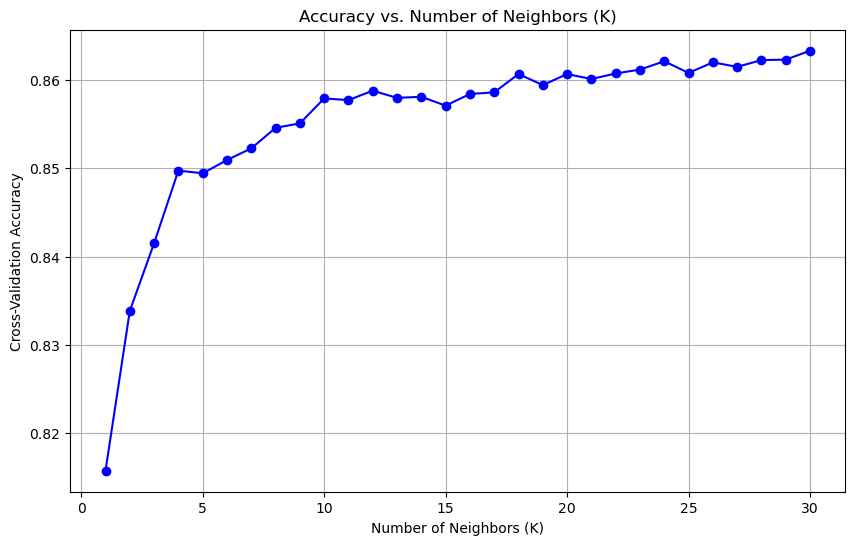

In [62]:
# Extract the cross-validation results for all values of K
cv_results = grid_search.cv_results_

# Plot the mean test accuracy for each K
plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_neighbors'], cv_results['mean_test_score'], marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Accuracy vs. Number of Neighbors (K)')
plt.grid(True)
plt.show()

In [63]:
# Train the KNN classifier with the best K value
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_selected, y_train)

# Make predictions on both training and testing sets
y_train_pred = knn_best.predict(X_train_selected)
y_test_pred = knn_best.predict(X_test_selected)

# Calculate accuracy and F1-score for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Calculate accuracy and F1-score for the testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print the results for the best K value
print(f"Training Accuracy with Best K ({best_k}): {train_accuracy}")
print(f"Training F1-Score with Best K ({best_k}): {train_f1}")
print(f"Testing Accuracy with Best K ({best_k}): {test_accuracy}")
print(f"Testing F1-Score with Best K ({best_k}): {test_f1}")

Training Accuracy with Best K (30): 0.8691582914572864
Training F1-Score with Best K (30): 0.6931801443511563
Testing Accuracy with Best K (30): 0.8630653266331658
Testing F1-Score with Best K (30): 0.6887492861222159


Conclusion:
The KNN model with K=30 performs consistently across both training and testing datasets, with accuracy around 86% and F1-scores around 69%.
There is no significant evidence of overfitting, as the metrics are closely aligned between the training and testing sets.
The F1-score, while lower than accuracy, indicates that the model might still make some mistakes in classifying positive vs negative instances, but overall, the model is balanced.

### Step 3.3 Study how the distance metrics affect the model performance (10 marks)
1. Change the distance metric parameter to 3 distance types: 'euclidean'(also l2), 'l1', and 'cosine', respectively, and visualise the model performance with these 3 distances, using a bar chart for both accuracy and f1 scores.
2. Compare the performance metrics, which is the best? Which is the worest?

In [66]:
# List and Dictionaries
distance_metrics = ['euclidean', 'manhattan', 'cosine']
accuracy_results = {}
f1_results = {}

for metric in distance_metrics:
    # Initialize KNN (K=30 )
    knn = KNeighborsClassifier(n_neighbors=30, metric=metric)
    
    # Train the model
    knn.fit(X_train_selected, y_train)
    
    # Make predictions
    y_train_pred = knn.predict(X_train_selected)
    y_test_pred = knn.predict(X_test_selected)
    
    # Calculate accuracy and F1-score
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    # Store the results
    accuracy_results[metric] = test_accuracy
    f1_results[metric] = test_f1

print("Accuracy results for each distance metric:", accuracy_results)
print("F1-Score results for each distance metric:", f1_results)


Accuracy results for each distance metric: {'euclidean': 0.8630653266331658, 'manhattan': 0.8670854271356784, 'cosine': 0.8748743718592965}
F1-Score results for each distance metric: {'euclidean': 0.6887492861222159, 'manhattan': 0.7006225240520656, 'cosine': 0.7254685777287762}


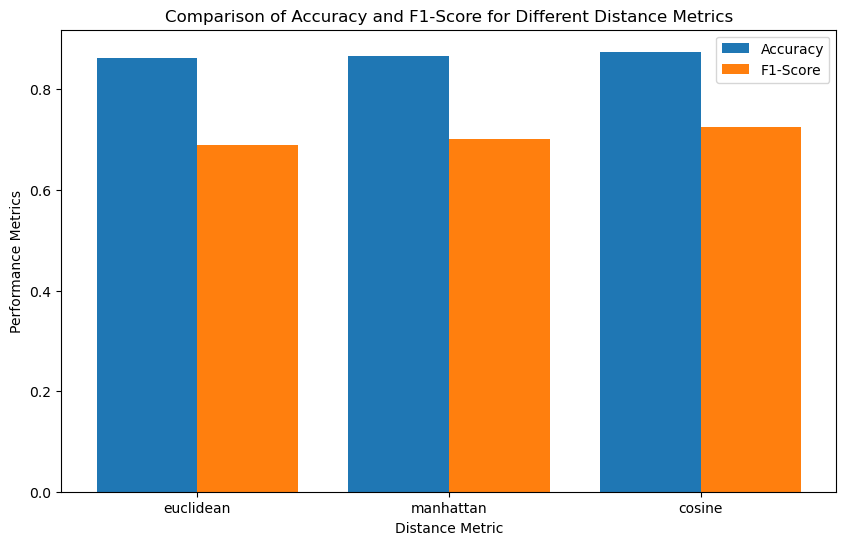

In [67]:
# Create a bar chart to compare
metrics = list(accuracy_results.keys())
accuracy_values = list(accuracy_results.values())
f1_values = list(f1_results.values()) 

# Create a bar chart for Accuracy and F1-score
x = range(len(metrics))

plt.figure(figsize=(10, 6))

# Plot accuracy bars and f1-score 
plt.bar(x, accuracy_values, width=0.4, label='Accuracy', align='center')
plt.bar([i + 0.4 for i in x], f1_values, width=0.4, label='F1-Score', align='center')

plt.xlabel('Distance Metric')
plt.ylabel('Performance Metrics')
plt.title('Comparison of Accuracy and F1-Score for Different Distance Metrics')
plt.xticks([i + 0.2 for i in x], metrics) 
plt.legend()
plt.show()

##### Conclusion:
- Cosine Distance performs the best, achieving the highest accuracy (87.49%) and F1-score (72.55%). This suggests that cosine distance effectively captures the relationships between data.
- Manhattan Distance with moderate performance in accuracy (86.71%) and F1-score (70.06%).
- Euclidean Distance performs the worst, with the lowest accuracy (86.31%) and F1-score (68.87%), indicating it may not effectively handle the data.
  
Overall, cosine distance is the most suitable distance metric for maximizing the model performance.